In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering


you have to figure out how you can use the work iarantsoa did in this file + change this:<br>
user_style_matrix_scaled<br>
to adapt to what she has

In [2]:
df = pd.read_csv('../../knnData/BA_US_knn_text.csv')

(6331638, 17)
(1829363, 10)
   abv  appearance  taste    rating  style_Altbier  \
0 -0.5         0.0  -0.50 -0.313433            0.0   
1 -0.5        -1.0  -0.75 -1.014925            0.0   
2 -0.5        -2.0  -0.50 -0.955224            0.0   
3 -0.5         0.0   0.00  0.134328            0.0   
4 -0.5         0.0   0.50  0.731343            0.0   

   style_American Adjunct Lager  style_American Amber / Red Ale  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             0.0   
4                           0.0                             0.0   

   style_American Amber / Red Lager  style_American Barleywine  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0           

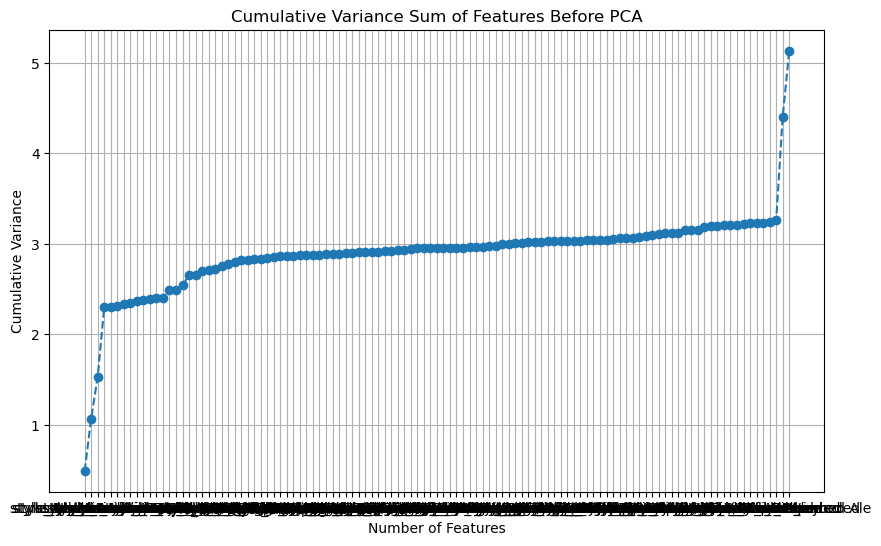

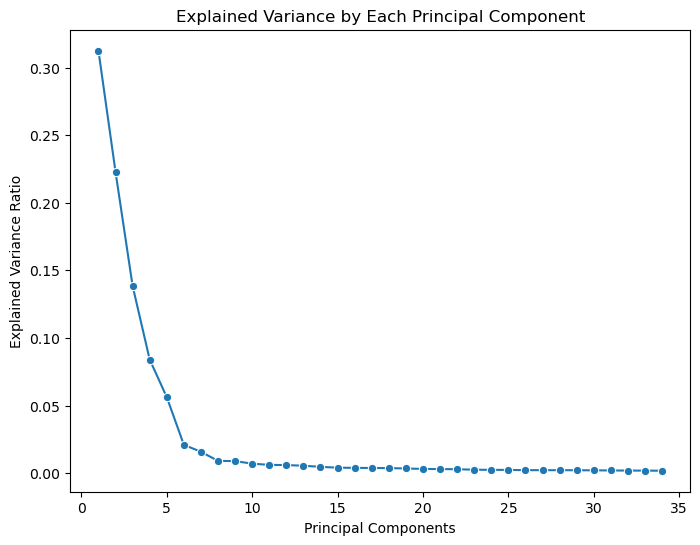

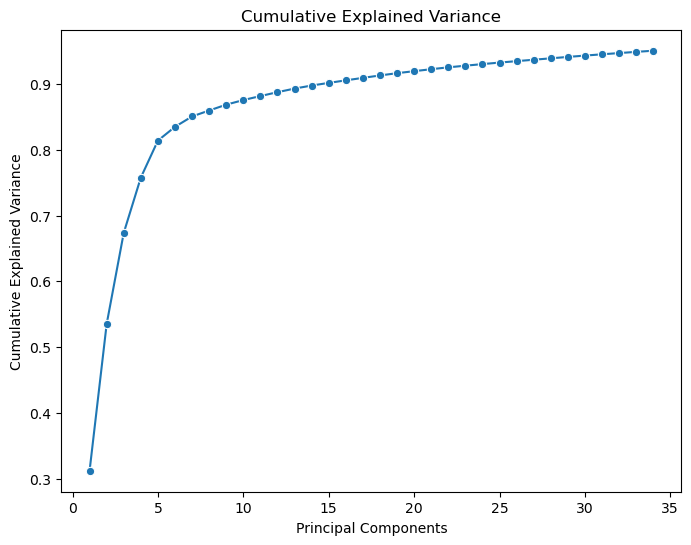

PCA transformed data saved as 'pca_transformed_data.csv'
Shape of the DataFrame: (1829363, 34)


In [3]:
%run param_selec.ipynb

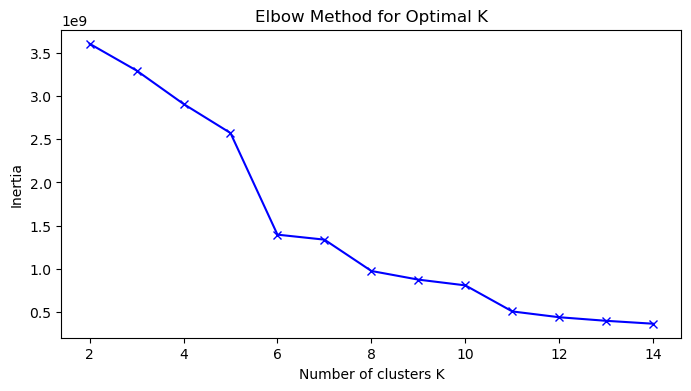

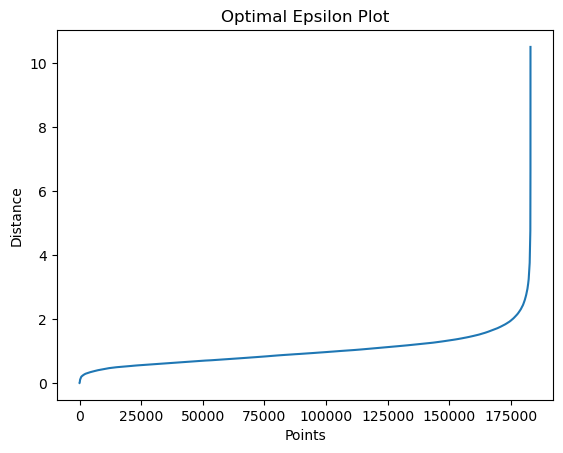

In [95]:
#======================================
#IMPUTATION
#======================================

'''
iter_imputer = IterativeImputer(random_state=42)
X_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(X), columns=X.columns)

print(X_iter_imputed.isnull().sum())
'''
#======================================
#SCALING
#======================================

#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MinMaxScaler()
#you use this one if the iterative imputer is running
#X_scaled = pd.DataFrame(scaler.fit_transform(X_iter_imputed), columns=X_iter_imputed.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X_pca_df), columns=X_pca_df.columns)

#======================================
#IMPROVEMENTS ON CLUSTERING
#======================================

#KMEANS
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#DBSCAN
X_subset = X_scaled.sample(frac=0.1, random_state=42)  # Use 10% of the data

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_subset)
distances, indices = neighbors_fit.kneighbors(X_subset)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("Optimal Epsilon Plot")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

In [96]:

#======================================
#K MEANS CLUSTERING
#======================================
'''
optimal_k = 4
#kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans = KMeans(n_clusters=optimal_k, n_init=50, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
X_scaled['cluster'] = cluster_labels

#silhouette_avg = silhouette_score(X_scaled.drop('cluster', axis=1), cluster_labels)
#print(f'Silhouette Score for K={optimal_k}: {silhouette_avg}')
'''
#======================================
#DBSCAN
#======================================

dbscan = DBSCAN(eps=1.0, min_samples=5, n_jobs=-1)
cluster_labels = dbscan.fit_predict(X_scaled)
X_scaled['cluster'] = cluster_labels

#======================================
#AGGLOMERATIVE CLUSTERING
#======================================
'''
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = agglo.fit_predict(X_scaled)
X_scaled['cluster'] = cluster_labels
'''


"\nagglo = AgglomerativeClustering(n_clusters=5, linkage='ward')\ncluster_labels = agglo.fit_predict(X_scaled)\nX_scaled['cluster'] = cluster_labels\n"

You are using iterative imputation, which predicts the missing values based on the other features (see param_selec.ipynb => there are ~2.7 million Nan values in certain columns)<br>


You want to look for the "elbow" point in the inertia plot (how close the points are to their center of cluster) => you pick starting that point<br>
=> us around 5 or 6 or 7

In [97]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,cluster
0,-0.346189,-0.146942,-0.685234,-0.273492,0.534917,-0.246150,0.254506,0.093639,-0.266532,-0.367649,...,-0.589257,0.557917,0.531034,0.893527,0.742139,0.458244,-0.515936,-0.760959,-0.992836,0
1,-1.354820,1.855501,-0.031054,-0.089516,-0.323308,0.072194,0.611002,0.206538,-0.251307,-0.136350,...,-0.665407,-0.137852,0.380343,0.619899,0.528079,0.311400,-0.267596,-0.521869,-0.708290,0
2,-1.219042,-0.586325,-0.547099,0.037927,-1.896452,0.192500,0.514411,0.185031,-0.220118,-0.117123,...,-1.054798,-0.330661,0.300205,0.513601,0.346318,0.336668,-0.375703,-0.376182,0.136386,0
3,-0.172341,1.244562,-0.492725,-0.488170,0.015287,-0.276796,0.260339,0.068683,-0.306173,-0.394756,...,-0.474340,0.498244,0.856307,0.892988,0.689989,0.491771,-0.425751,-0.750646,-1.150111,0
4,0.460407,-0.119832,-0.943937,-0.628397,-0.597174,-0.386526,0.049483,-0.007804,-0.319516,-0.509234,...,-0.563164,0.705130,1.062401,0.971819,0.677792,0.590237,-0.547801,-0.789870,-0.970242,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829358,-0.976397,-0.615095,-0.492932,0.503728,0.320415,-0.424567,-0.484958,3.286564,7.693536,2.281015,...,-0.280648,0.141141,-0.827264,-0.666332,-0.027324,0.042926,0.559859,0.108360,0.593787,15
1829359,-0.358000,-0.227511,-0.734607,-0.374050,-0.723419,-0.226675,0.245513,0.067626,-0.381957,-0.433083,...,-0.649332,0.061197,0.768055,1.313154,0.867864,0.776766,-0.647667,-0.939795,-0.819218,0
1829360,-1.696628,-0.636674,-0.392877,0.216081,0.020997,0.115973,0.629483,0.280850,-0.275939,-0.149380,...,-1.205498,-0.242180,0.132508,1.096683,0.851766,0.430057,-0.864517,-0.896837,-0.817069,0
1829361,-2.806287,-1.195477,-0.131715,0.748032,1.559726,0.265359,0.770007,0.263710,-0.245872,-0.008567,...,-0.190866,-0.938782,-1.197408,0.967372,0.873471,0.665239,0.046548,-0.487661,0.374516,0


In [98]:
'''
for column in X_scaled.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_scaled[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
'''

"\nfor column in X_scaled.columns:\n    plt.figure(figsize=(6, 4))\n    sns.histplot(X_scaled[column], kde=True)\n    plt.title(f'Distribution of {column}')\n    plt.show()\n"

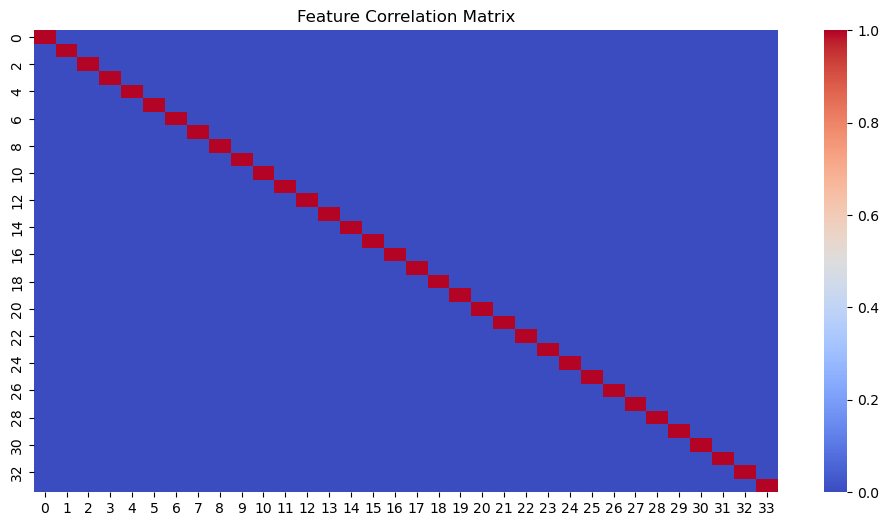

In [99]:
plt.figure(figsize=(12, 6))
corr_matrix = X_scaled.drop('cluster', axis=1).corr()
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [100]:
df.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,user_id,appearance,aroma,palate,taste,overall,rating,text,avg,user_state,beer_state
0,Kupfer Kolsch,289320.0,Copper State Brewing Company,49595.0,Kölsch,4.4,n2185.211743,2.50,4.00,4.00,3.75,3.75,3.76,NaN,3.76,North Carolina,Wisconsin
1,Northwestern Alt,289321.0,Copper State Brewing Company,49595.0,Altbier,4.6,n2185.211743,3.00,3.75,4.00,3.50,3.50,3.58,NaN,3.58,North Carolina,Wisconsin
2,One Cent Wheat,289319.0,Copper State Brewing Company,49595.0,Witbier,5.4,n2185.211743,3.75,3.25,3.75,3.50,3.50,3.48,NaN,3.48,North Carolina,Wisconsin
3,Platinum Coffee Blonde,289324.0,Copper State Brewing Company,49595.0,American Blonde Ale,7.3,n2185.211743,3.25,3.75,3.50,4.25,4.25,4.00,NaN,4.02,North Carolina,Wisconsin
4,Platinum Coffee Blonde,289324.0,Copper State Brewing Company,49595.0,American Blonde Ale,7.3,angerhaus.1049226,4.00,4.25,3.75,4.00,4.00,4.04,NaN,4.02,Wisconsin,Wisconsin


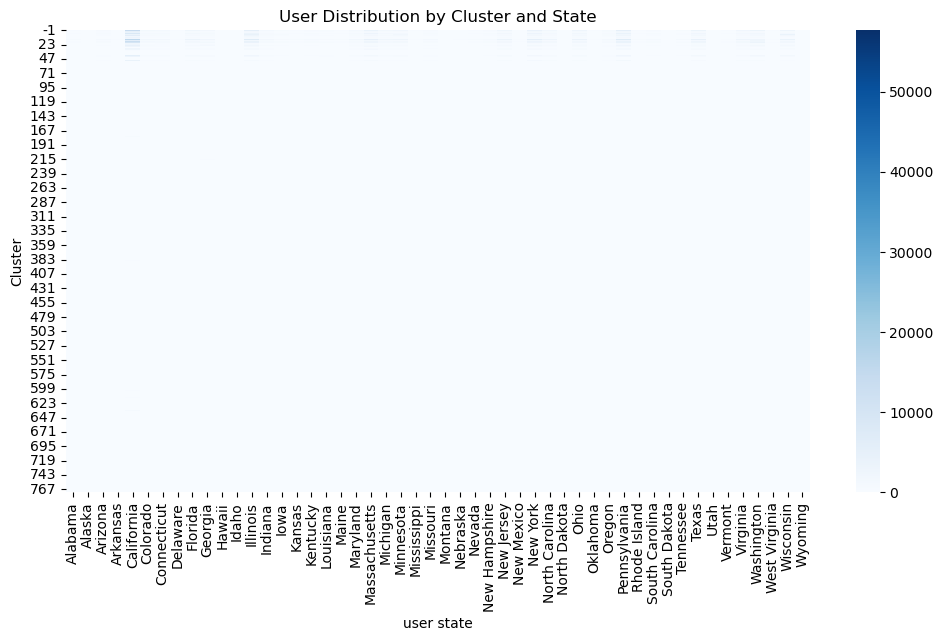

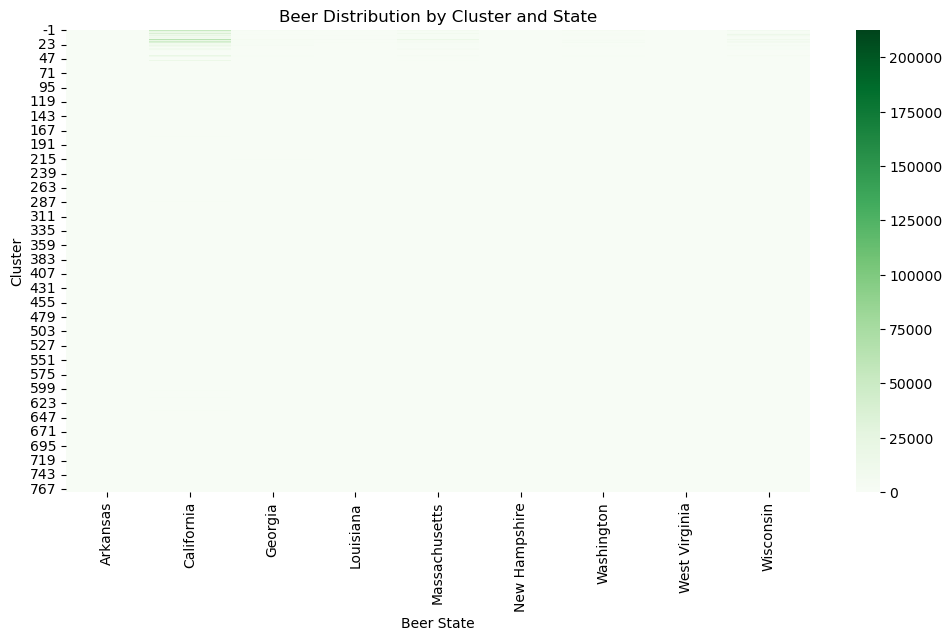

In [101]:
cluster_labels_df = X_scaled[['cluster']].reset_index(drop=True)
#you can use this (down) when the itreative imputer is able to run
#cluster_labels_df['user_id'] = df['user_id'].values
#cluster_labels_df['beer_id'] = df['beer_id'].values
cluster_labels_df['user_id'] = df.loc[X_pca_df.index, 'user_id'].values
cluster_labels_df['beer_id'] = df.loc[X_pca_df.index, 'beer_id'].values


cluster_labels_df = cluster_labels_df.merge(
    df[['user_id', 'user_state']].drop_duplicates(),
    on='user_id',
    how='left'
)

if 'beer_id' in df.columns:
    cluster_labels_df = cluster_labels_df.merge(
        df[['beer_id', 'beer_state']].drop_duplicates(),
        on='beer_id',
        how='left'
    )

user_cluster_state_counts = cluster_labels_df.groupby(['cluster', 'user_state']).size().unstack(fill_value=0)

if 'beer_state' in cluster_labels_df.columns:
    beer_cluster_state_counts = cluster_labels_df.groupby(['cluster', 'beer_state']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(user_cluster_state_counts, annot=False, fmt='d', cmap='Blues')
plt.title('User Distribution by Cluster and State')
plt.xlabel('user state')
plt.ylabel('Cluster')
plt.show()

if 'beer_state' in cluster_labels_df.columns:
    plt.figure(figsize=(12, 6))
    sns.heatmap(beer_cluster_state_counts, annot=False, fmt='d', cmap='Greens')
    plt.title('Beer Distribution by Cluster and State')
    plt.xlabel('Beer State')
    plt.ylabel('Cluster')
    plt.show()


In [102]:
user_cluster_state_counts_t = user_cluster_state_counts.T
user_cluster_state_counts_t

cluster,-1,0,1,2,3,4,5,6,7,8,...,762,763,764,765,766,767,768,769,770,771
user_state,,,,,,,,,,,,,,,,,,,,,
Alabama,434,1694,131,83,112,305,269,156,90,220,...,0,0,0,0,0,0,0,0,0,0
Alaska,120,543,60,25,31,101,66,72,28,51,...,0,0,0,0,0,0,0,0,0,0
Arizona,891,3415,316,197,237,635,446,303,220,420,...,0,0,0,0,0,0,0,0,0,0
Arkansas,191,845,64,32,47,123,86,80,34,62,...,0,0,0,0,0,0,0,0,0,0
California,14248,57682,4974,2430,3684,8737,5767,3220,3007,6299,...,0,1,1,0,1,0,0,0,0,2
Colorado,1432,5951,563,309,352,1002,779,671,366,688,...,0,0,1,0,1,0,0,0,1,0
Connecticut,1229,5306,457,268,310,1039,848,507,318,559,...,2,1,0,0,0,0,1,0,0,0
Delaware,261,923,63,40,71,172,120,90,59,96,...,0,0,0,0,0,0,0,0,0,0
Florida,2287,8599,659,500,582,1479,1278,736,512,1011,...,0,0,0,0,1,1,1,0,0,0


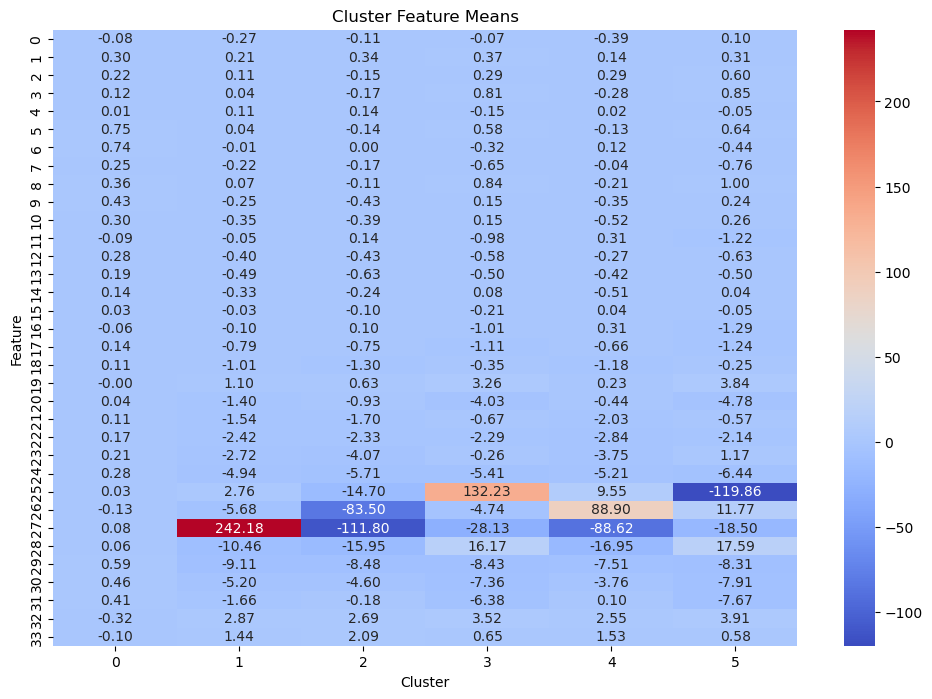

In [103]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cluster Feature Means')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

/var/folders/qf/dk7tzwpd1_j2430sljmhw_c40000gq/T/ipykernel_45066/1768940291.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


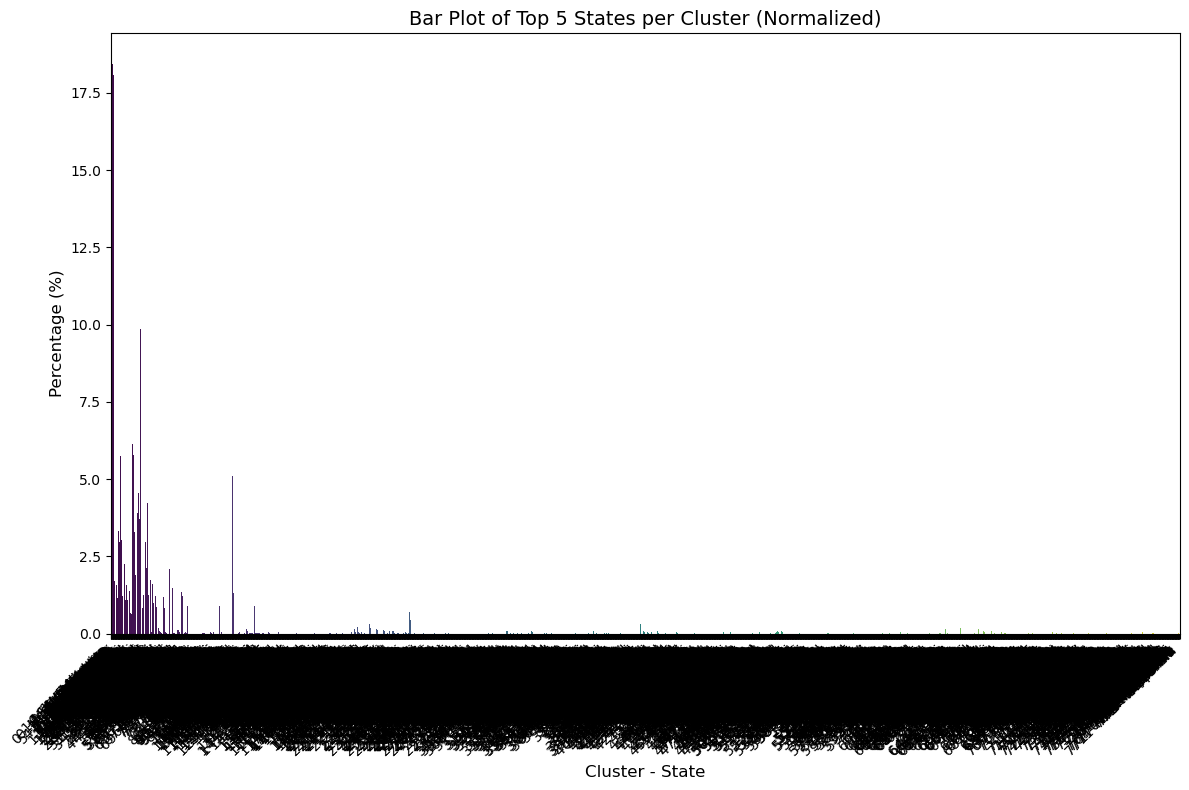

In [104]:
top_5_data = []
state_totals = user_cluster_state_counts_t.sum(axis=1)
normalized_cluster_data = user_cluster_state_counts_t.div(state_totals, axis=0)

for cluster_label, cluster_data in normalized_cluster_data.items():
    top_states = cluster_data.nlargest(5).index
    top_values = cluster_data.nlargest(5).values

    top_5_data.append(pd.DataFrame({
        'state': top_states,
        'percentage': top_values * 100,  # Convert to percentage
        'cluster': cluster_label
    }))

top_5_df = pd.concat(top_5_data)
top_5_df['cluster_state'] = top_5_df['cluster'].astype(str) + " - " + top_5_df['state']

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_5_df,
    x='cluster_state',
    y='percentage',
    palette="viridis"  # Optional: to differentiate colors
)

plt.xticks(rotation=45, ha='right')
plt.title("Bar Plot of Top 5 States per Cluster (Normalized)", fontsize=14)
plt.xlabel("Cluster - State", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.tight_layout()
plt.show()


In [105]:
state_totals = user_cluster_state_counts_t.sum(axis=1)
#print(state_totals)

normalized_cluster_data = user_cluster_state_counts_t.div(state_totals, axis=0)

for cluster_label, cluster_data in normalized_cluster_data.items():
    top_states = cluster_data.nlargest(10).index
    print(f"Cluster {cluster_label}: {', '.join(top_states)}")


Cluster -1: Delaware, Montana, Oklahoma, South Dakota, Washington, Michigan, Rhode Island, Wyoming, Arizona, California
Cluster 0: New Mexico, Massachusetts, Washington, Montana, New Hampshire, Rhode Island, Alaska, New Jersey, Oregon, California
Cluster 1: Wyoming, Alaska, Louisiana, Oregon, Utah, Colorado, Montana, Vermont, Arizona, Kentucky
Cluster 2: Wisconsin, Illinois, Iowa, Vermont, Wyoming, Minnesota, Montana, Utah, South Dakota, Rhode Island
Cluster 3: Utah, Delaware, Maine, Virginia, Pennsylvania, Idaho, Arizona, Hawaii, North Carolina, New York
Cluster 4: Maine, Hawaii, Utah, Alaska, Massachusetts, Idaho, Connecticut, Rhode Island, Delaware, New Hampshire
Cluster 5: Wisconsin, Minnesota, New Hampshire, West Virginia, Montana, Illinois, Connecticut, Rhode Island, South Dakota, Iowa
Cluster 6: Wisconsin, Minnesota, Illinois, Iowa, Indiana, Alaska, South Dakota, Missouri, Montana, Colorado
Cluster 7: Minnesota, North Dakota, South Dakota, Iowa, Tennessee, Nebraska, Missouri, Lo

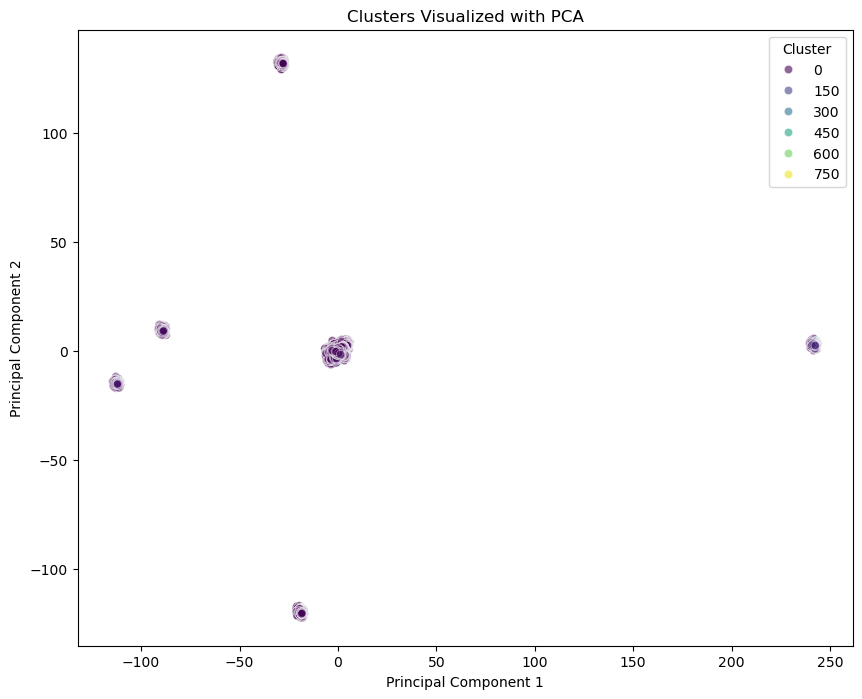

Explained Variance by PC1: 0.40
Explained Variance by PC2: 0.16


In [106]:
features = X_scaled.drop('cluster', axis=1)

pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(features)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    alpha=0.6
)
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained Variance by PC2: {explained_variance[1]:.2f}')


   id        name  density                                           geometry
0  01     Alabama   94.650  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona   57.050  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


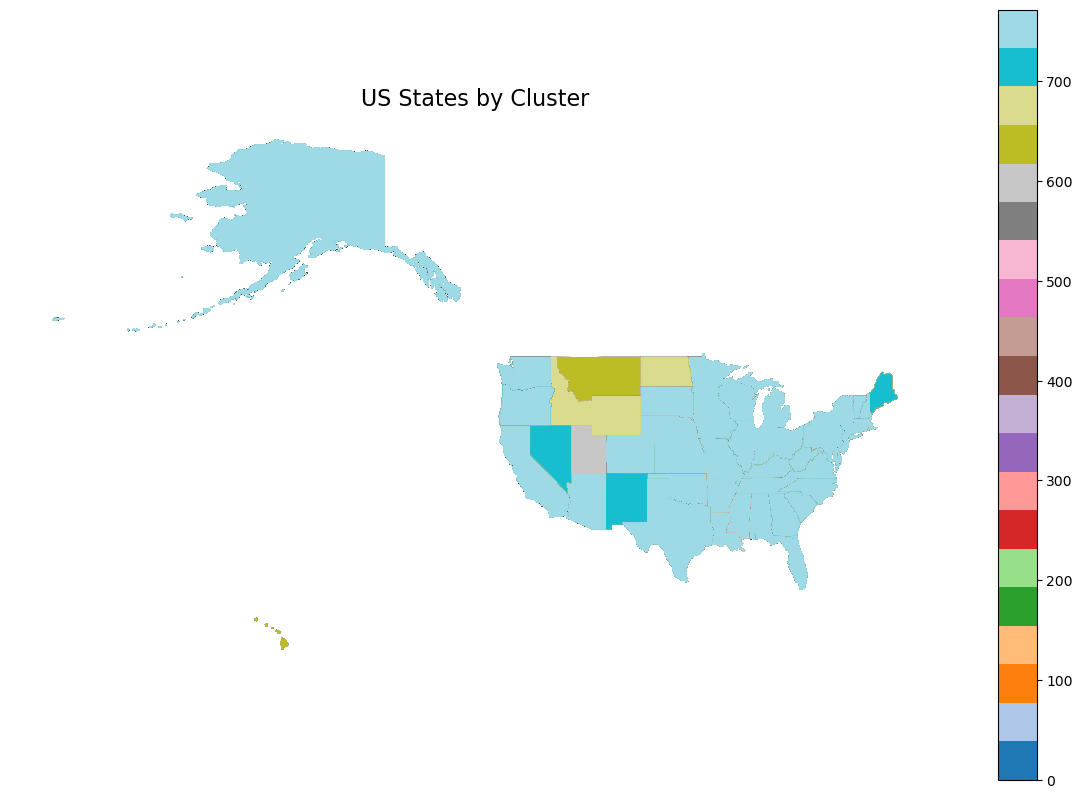

State names in us_map:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']

State names in state_cluster_df:
['Delaware' 'Montana' 'Oklahoma' 'South Dakota' 'Washington' 'Michigan'
 'Rhode Island' 'Wyoming' 'Arizona' 'California' 'New Mexico'
 'Massachusetts' 'New Hampshire' 'Alaska' 'New Jersey' 'Oregon'
 'Louisiana' 'Utah' 'Colorado' 'Vermont' 'Kentucky' 'Wisconsin' 'Illinois'
 'Iowa' 'Minnesota' 'Maine' 'Virginia' 'Pennsylvani

In [114]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

us_map = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
print(us_map.head())
us_map.rename(columns={'name': 'state'}, inplace=True)


state_cluster_map = []  
cluster_list = []  

for cluster_label, cluster_data in normalized_cluster_data.items():
    top_states = cluster_data.nlargest(10).index.tolist()  
    cluster_list.append(top_states)

for cluster_id, states in enumerate(cluster_list):
    for state in states:
        state_cluster_map.append({'state': state, 'cluster': cluster_id})

state_cluster_df = pd.DataFrame(state_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', left_on='state', right_on='state')

ax = merged_map.plot(column='cluster', cmap='tab20', figsize=(15, 10), legend=True)
ax.set_title("US States by Cluster", fontsize=16)
ax.axis('off')
plt.show()

print("State names in us_map:")
print(us_map['state'].unique())

print("\nState names in state_cluster_df:")
print(state_cluster_df['state'].unique())


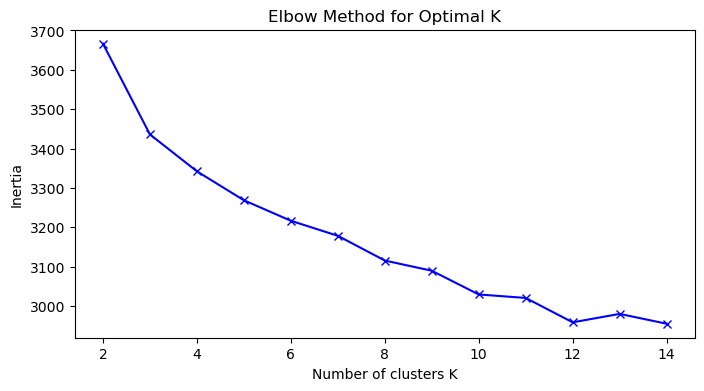

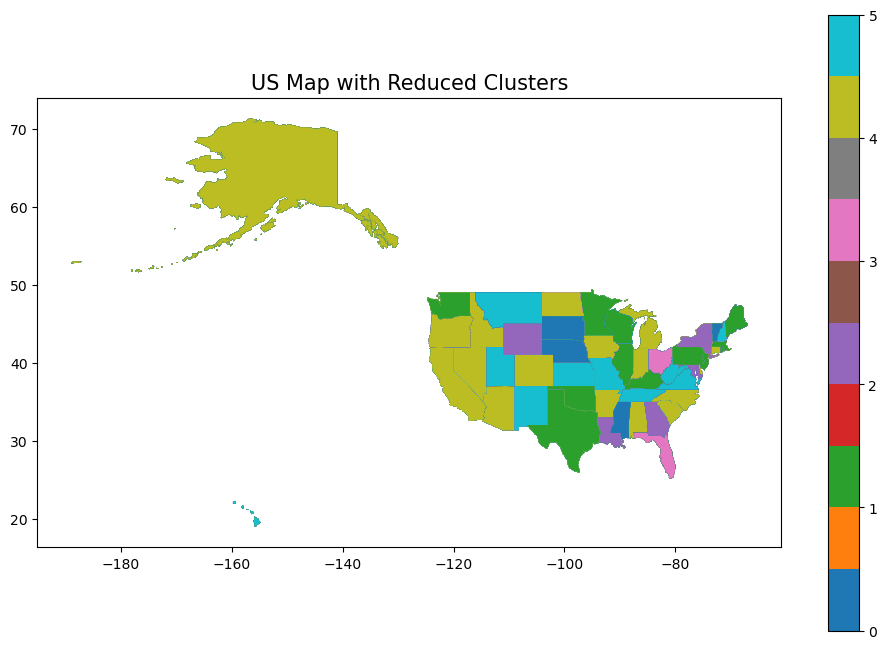

In [119]:
unique_states = list({state for cluster in cluster_list for state in cluster})
cluster_matrix = []

for cluster in cluster_list:
    cluster_vector = [1 if state in cluster else 0 for state in unique_states]
    cluster_matrix.append(cluster_vector)

cluster_df = pd.DataFrame(cluster_matrix, columns=unique_states)

inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

reduced_kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust `n_clusters` as needed
cluster_df['reduced_cluster'] = reduced_kmeans.fit_predict(cluster_df)

reduced_cluster_map = dict(zip(range(len(cluster_list)), cluster_df['reduced_cluster']))

state_cluster_df['reduced_cluster'] = state_cluster_df['cluster'].map(reduced_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', on='state')

fig, ax = plt.subplots(figsize=(12, 8))
merged_map.plot(column='reduced_cluster', cmap='tab10', legend=True, ax=ax)
ax.set_title('US Map with Reduced Clusters', fontsize=15)
plt.show()


### From DBSCAN with eps = 1.5 (thomas ran)

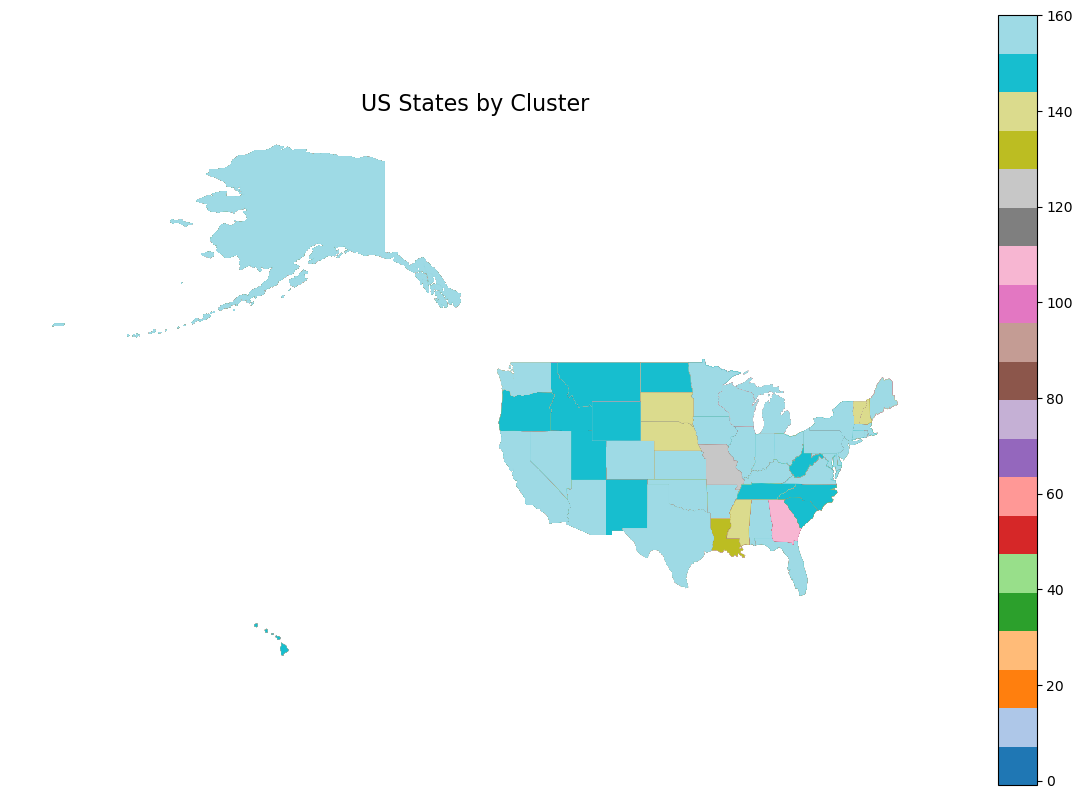

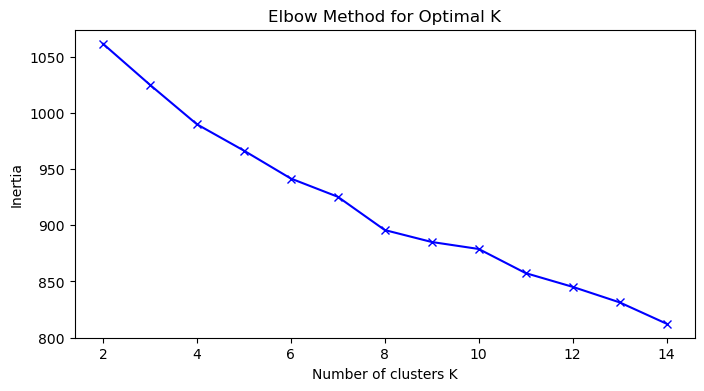

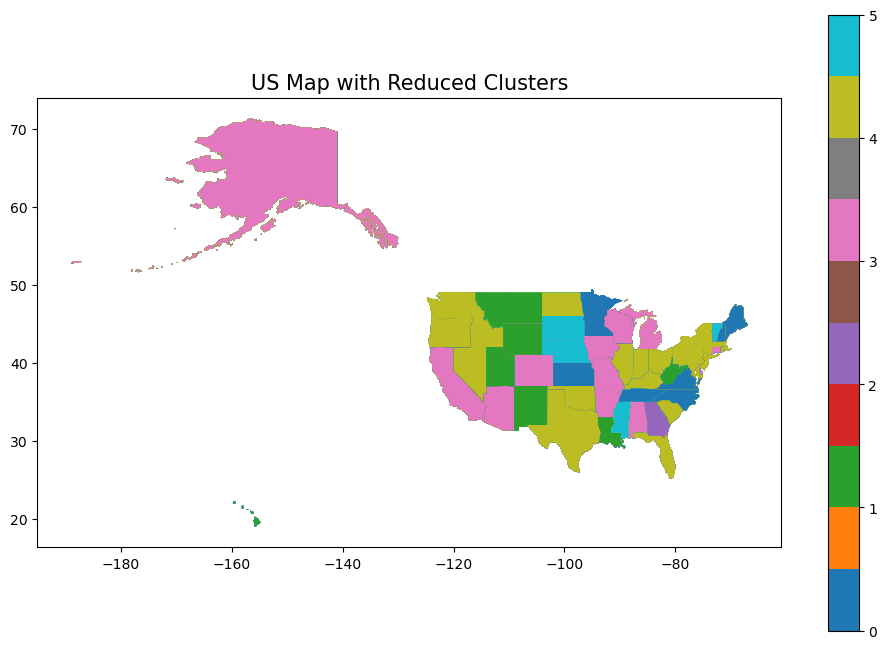

In [125]:
us_map = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
us_map.rename(columns={'name': 'state'}, inplace=True)

cluster_data = {
    -1: ['North Dakota', 'Delaware', 'Nebraska', 'Mississippi', 'Arkansas', 'Hawaii', 'Rhode Island', 'Oregon', 'Alabama', 'Vermont'],
    0: ['New Mexico', 'Massachusetts', 'Montana', 'Washington', 'Rhode Island', 'New Hampshire', 'California', 'New Jersey', 'Alaska', 'Oregon'],
    1: ['Wyoming', 'Alaska', 'Louisiana', 'Oregon', 'Colorado', 'Vermont', 'Montana', 'Arizona', 'Utah', 'Pennsylvania'],
    2: ['Montana', 'Hawaii', 'Georgia', 'Colorado', 'Wyoming', 'West Virginia', 'California', 'South Carolina', 'Pennsylvania', 'Utah'],
    3: ['Wisconsin', 'Illinois', 'Montana', 'Iowa', 'Vermont', 'Minnesota', 'Wyoming', 'South Dakota', 'Utah', 'Missouri'],
    4: ['Utah', 'Delaware', 'Maine', 'Virginia', 'Hawaii', 'Pennsylvania', 'Arizona', 'North Carolina', 'Idaho', 'New York'],
    5: ['Hawaii', 'Maine', 'Utah', 'Massachusetts', 'Connecticut', 'Rhode Island', 'Alaska', 'Idaho', 'New Hampshire', 'New York'],
    6: ['Wisconsin', 'Minnesota', 'New Hampshire', 'South Dakota', 'West Virginia', 'Illinois', 'Montana', 'Connecticut', 'Rhode Island', 'Tennessee'],
    7: ['Wisconsin', 'Minnesota', 'Illinois', 'Iowa', 'Indiana', 'Alaska', 'South Dakota', 'Colorado', 'Missouri', 'Montana'],
    8: ['South Dakota', 'Minnesota', 'North Dakota', 'Iowa', 'Texas', 'Louisiana', 'Missouri', 'Tennessee', 'Indiana', 'New Jersey'],
    9: ['South Dakota', 'Wisconsin', 'Iowa', 'North Dakota', 'Nebraska', 'Minnesota', 'Michigan', 'Indiana', 'Illinois', 'Nevada'],
    10: ['South Dakota', 'Utah', 'Wisconsin', 'Minnesota', 'Iowa', 'Illinois', 'West Virginia', 'Nebraska', 'Indiana', 'Oklahoma'],
    11: ['Mississippi', 'Wisconsin', 'Alaska', 'Washington', 'Oregon', 'South Carolina', 'Georgia', 'Iowa', 'Tennessee', 'Florida'],
    12: ['Michigan', 'Nevada', 'Washington', 'West Virginia', 'North Carolina', 'Florida', 'Nebraska', 'Virginia', 'Maryland', 'Texas'],
    13: ['North Dakota', 'Washington', 'Maine', 'Wyoming', 'Idaho', 'Nevada', 'Rhode Island', 'New Hampshire', 'California', 'Alaska'],
    14: ['Mississippi', 'Maine', 'Kentucky', 'West Virginia', 'Tennessee', 'Florida', 'North Dakota', 'Michigan', 'Missouri', 'Iowa'],
    15: ['Arkansas', 'Montana', 'South Dakota', 'Mississippi', 'Utah', 'Louisiana', 'Kansas', 'West Virginia', 'Tennessee', 'North Dakota'],
    16: ['Washington', 'West Virginia', 'Alaska', 'Oregon', 'New Mexico', 'Nebraska', 'Georgia', 'Delaware', 'Montana', 'Florida'],
    17: ['Georgia', 'Alabama', 'South Carolina', 'Tennessee', 'North Carolina', 'Florida', 'Mississippi', 'Delaware', 'Nebraska', 'Idaho'],
    18: ['California', 'New Mexico', 'North Dakota', 'Nevada', 'Hawaii', 'Arizona', 'Idaho', 'Vermont', 'Alaska', 'North Carolina'],
    19: ['Washington', 'Louisiana', 'Idaho', 'West Virginia', 'Oregon', 'Vermont', 'Arizona', 'Montana', 'Tennessee', 'Kentucky'],
    20: ['Wisconsin', 'Utah', 'Kansas', 'California', 'Arkansas', 'New Mexico', 'Nevada', 'Wyoming', 'Iowa', 'North Dakota'],
    21: ['Rhode Island', 'Oklahoma', 'South Dakota', 'Massachusetts', 'Arizona', 'Utah', 'Ohio', 'North Dakota', 'Missouri', 'Virginia'],
    22: ['Wyoming', 'Hawaii', 'Georgia', 'Tennessee', 'Arizona', 'Wisconsin', 'Iowa', 'New Hampshire', 'Texas', 'West Virginia'],
    23: ['West Virginia', 'Georgia', 'Mississippi', 'South Dakota', 'Tennessee', 'North Dakota', 'Florida', 'Maryland', 'Washington', 'Alabama'],
    24: ['Massachusetts', 'New Mexico', 'Georgia', 'Maine', 'Rhode Island', 'Alabama', 'Nebraska', 'Nevada', 'Vermont', 'New Hampshire'],
    25: ['South Dakota', 'Massachusetts', 'Rhode Island', 'Washington', 'New Hampshire', 'Utah', 'Idaho', 'Vermont', 'Oregon', 'Maine'],
    26: ['Mississippi', 'Louisiana', 'Oklahoma', 'Kentucky', 'Kansas', 'Utah', 'Vermont', 'Wyoming', 'Alabama', 'Rhode Island'],
    27: ['Louisiana', 'Mississippi', 'Missouri', 'Indiana', 'Iowa', 'Ohio', 'Rhode Island', 'Alabama', 'Nebraska', 'South Dakota'],
    28: ['Louisiana', 'Mississippi', 'Arkansas', 'Montana', 'Oklahoma', 'North Dakota', 'Texas', 'South Dakota', 'Tennessee', 'Michigan'],
    29: ['Arkansas', 'Massachusetts', 'Connecticut', 'Maine', 'New Hampshire', 'Rhode Island', 'Utah', 'Nebraska', 'Vermont', 'Michigan'],
    30: ['Hawaii', 'Michigan', 'Missouri', 'Delaware', 'California', 'Wyoming', 'Arizona', 'Alabama', 'Nebraska', 'South Carolina'],
    31: ['West Virginia', 'Louisiana', 'Hawaii', 'Utah', 'Nebraska', 'Tennessee', 'Alabama', 'Kentucky', 'Indiana', 'Arkansas'],
    32: ['Vermont', 'Montana', 'Arkansas', 'Kentucky', 'Mississippi', 'Tennessee', 'New Hampshire', 'Utah', 'Missouri', 'Indiana'],
    33: ['Idaho', 'Hawaii', 'Nevada', 'West Virginia', 'Oregon', 'Missouri', 'Louisiana', 'North Carolina', 'Arkansas', 'Florida'],
    34: ['Hawaii', 'Wyoming', 'West Virginia', 'Louisiana', 'Arizona', 'Indiana', 'Nevada', 'Rhode Island', 'Wisconsin', 'Pennsylvania'],
    35: ['Alaska', 'Oklahoma', 'Arkansas', 'Nebraska', 'Iowa', 'Connecticut', 'Minnesota', 'Kansas', 'Missouri', 'Alabama'],
    36: ['Hawaii', 'Alaska', 'Rhode Island', 'Maine', 'New Mexico', 'Wyoming', 'Missouri', 'Arizona', 'Georgia', 'Oregon'],
    37: ['North Dakota', 'Wyoming', 'South Dakota', 'Oklahoma', 'Louisiana', 'Kansas', 'Iowa', 'Montana', 'Minnesota', 'California'],
    38: ['Delaware', 'West Virginia', 'Utah', 'Arkansas', 'Kentucky', 'Vermont', 'South Dakota', 'Montana', 'Connecticut', 'Idaho'],
    39: ['West Virginia', 'Louisiana', 'Alabama', 'Kentucky', 'Indiana', 'Minnesota', 'Delaware', 'Mississippi', 'Nebraska', 'New York'],
    40: ['Washington', 'Wisconsin', 'Louisiana', 'Wyoming', 'Hawaii', 'Utah', 'Virginia', 'Texas', 'Mississippi', 'New York'],
    41: ['Louisiana', 'Idaho', 'Georgia', 'Washington', 'Oregon', 'Hawaii', 'Utah', 'Wisconsin', 'Mississippi', 'Colorado'],
    42: ['North Dakota', 'Delaware', 'West Virginia', 'Wyoming', 'New Hampshire', 'Nevada', 'Arkansas', 'Kansas', 'Mississippi', 'Nebraska'],
    43: ['Nebraska', 'California', 'Connecticut', 'New York', 'Utah', 'Maine', 'Arizona', 'New Jersey', 'West Virginia', 'Hawaii'],
    44: ['West Virginia', 'Louisiana', 'Mississippi', 'Rhode Island', 'New Mexico', 'Maine', 'Missouri', 'North Dakota', 'Arizona', 'Oregon'],
    45: ['Utah', 'North Dakota', 'Wyoming', 'Louisiana', 'Mississippi', 'Rhode Island', 'South Dakota', 'Montana', 'Indiana', 'Tennessee'],
    46: ['Mississippi', 'South Dakota', 'Nebraska', 'New Mexico', 'West Virginia', 'Rhode Island', 'Oklahoma', 'New Hampshire', 'Indiana', 'Alabama'],
    47: ['South Dakota', 'West Virginia', 'Colorado', 'Hawaii', 'New Mexico', 'Minnesota', 'Connecticut', 'Kansas', 'Maryland', 'Virginia'],
    48: ['Louisiana', 'West Virginia', 'Nevada', 'Virginia', 'Wisconsin', 'Oregon', 'Indiana', 'Maryland', 'Texas', 'Missouri'],
    49: ['Rhode Island', 'Louisiana', 'Michigan', 'Massachusetts', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'],
    50: ['Maryland', 'Georgia', 'Minnesota', 'Florida', 'Wisconsin', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    51: ['Arkansas', 'West Virginia', 'Wyoming', 'Indiana', 'Michigan', 'Mississippi', 'Georgia', 'New Mexico', 'Louisiana', 'New York'],
    52: ['Idaho', 'Oklahoma', 'Wyoming', 'North Dakota', 'Delaware', 'Mississippi', 'Georgia', 'Texas', 'North Carolina', 'Maine'],
    53: ['Montana', 'Wyoming', 'Nevada', 'Arkansas', 'Iowa', 'Missouri', 'Alabama', 'Mississippi', 'New Mexico', 'Connecticut'],
    54: ['Wisconsin', 'Minnesota', 'Illinois', 'New York', 'Pennsylvania', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    55: ['Arkansas', 'Georgia', 'Utah', 'Oklahoma', 'Mississippi', 'South Carolina', 'Oregon', 'Wyoming', 'Tennessee', 'Vermont'],
    56: ['Oregon', 'Arkansas', 'Delaware', 'Kansas', 'Mississippi', 'West Virginia', 'Louisiana', 'Connecticut', 'Maine', 'Kentucky'],
    57: ['Arkansas', 'North Dakota', 'Delaware', 'Montana', 'Mississippi', 'Louisiana', 'Tennessee', 'Rhode Island', 'Alabama', 'Michigan'],
    58: ['Hawaii', 'Alaska', 'Vermont', 'Missouri', 'Iowa', 'Maine', 'New Hampshire', 'Wisconsin', 'New Jersey', 'Illinois'],
    59: ['Indiana', 'Virginia', 'New Jersey', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    60: ['Idaho', 'West Virginia', 'Nebraska', 'Delaware', 'Arkansas', 'Alaska', 'Maine', 'South Carolina', 'Louisiana', 'Ohio'],
    61: ['North Dakota', 'Montana', 'Iowa', 'Alaska', 'Indiana', 'Oklahoma', 'Maine', 'Nevada', 'Idaho', 'Arkansas'],
    62: ['West Virginia', 'Delaware', 'Iowa', 'South Carolina', 'Tennessee', 'Oregon', 'Colorado', 'New Mexico', 'Connecticut', 'Louisiana'],
    63: ['West Virginia', 'Alabama', 'Nevada', 'Idaho', 'Arkansas', 'Delaware', 'New Jersey', 'Mississippi', 'New York', 'Tennessee'],
    64: ['Utah', 'Montana', 'Louisiana', 'Oklahoma', 'Iowa', 'Virginia', 'Maine', 'Ohio', 'Pennsylvania', 'Kansas'],
    65: ['Utah', 'Illinois', 'Iowa', 'Delaware', 'Indiana', 'Michigan', 'Wyoming', 'Minnesota', 'Nebraska', 'Wisconsin'],
    66: ['West Virginia', 'Arkansas', 'Kansas', 'Oklahoma', 'Indiana', 'New Hampshire', 'Nevada', 'Virginia', 'Minnesota', 'Oregon'],
    67: ['Montana', 'Nevada', 'Michigan', 'Delaware', 'Kansas', 'Maryland', 'Mississippi', 'Colorado', 'West Virginia', 'Indiana'],
    68: ['New Mexico', 'Louisiana', 'Maryland', 'Maine', 'Minnesota', 'Rhode Island', 'Wisconsin', 'New Jersey', 'Connecticut', 'Kentucky'],
    69: ['South Dakota', 'West Virginia', 'Oklahoma', 'Kentucky', 'Georgia', 'Rhode Island', 'Kansas', 'Florida', 'Alabama', 'Pennsylvania'],
    70: ['North Carolina', 'Maine', 'Idaho', 'Tennessee', 'West Virginia', 'Wisconsin', 'Oklahoma', 'Vermont', 'Connecticut', 'Minnesota'],
    71: ['Hawaii', 'Mississippi', 'Wyoming', 'Rhode Island', 'Oklahoma', 'Kansas', 'Arizona', 'Maine', 'Nevada', 'Idaho'],
    72: ['Kansas', 'Louisiana', 'Missouri', 'Georgia', 'North Carolina', 'Illinois', 'Massachusetts', 'Alabama', 'Alaska', 'Arizona'],
    73: ['Utah', 'Montana', 'Nevada', 'West Virginia', 'Mississippi', 'Indiana', 'North Carolina', 'Oklahoma', 'Wisconsin', 'New Hampshire'],
    74: ['Montana', 'Louisiana', 'North Dakota', 'New Hampshire', 'Vermont', 'Michigan', 'Missouri', 'West Virginia', 'Hawaii', 'Alabama'],
    75: ['Utah', 'Rhode Island', 'South Dakota', 'Oklahoma', 'Arkansas', 'Kentucky', 'Oregon', 'Wisconsin', 'Minnesota', 'Connecticut'],
    76: ['Oregon', 'Illinois', 'Virginia', 'Wisconsin', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'],
    77: ['Hawaii', 'Alaska', 'Missouri', 'Mississippi', 'New Mexico', 'Kentucky', 'Louisiana', 'Maryland', 'Oklahoma', 'Tennessee'],
    78: ['Utah', 'Alaska', 'Oklahoma', 'Alabama', 'Idaho', 'Tennessee', 'Michigan', 'Delaware', 'New Mexico', 'Ohio'],
    79: ['South Carolina', 'North Carolina', 'Virginia', 'Florida', 'Washington', 'Massachusetts', 'New York', 'Alabama', 'Alaska', 'Arizona'],
    80: ['Utah', 'Delaware', 'Rhode Island', 'Alabama', 'West Virginia', 'Colorado', 'Vermont', 'New Hampshire', 'Pennsylvania', 'Nevada'],
    81: ['Iowa', 'Kentucky', 'Arizona', 'Florida', 'New York', 'Colorado', 'Washington', 'Michigan', 'Alabama', 'Alaska'],
    82: ['Kansas', 'Massachusetts', 'Washington', 'Michigan', 'Virginia', 'Minnesota', 'Ohio', 'Pennsylvania', 'Texas', 'Illinois'],
    83: ['South Carolina', 'Oregon', 'Massachusetts', 'New York', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    84: ['Alabama', 'Georgia', 'Arizona', 'North Carolina', 'New Jersey', 'Pennsylvania', 'Alaska', 'Arkansas', 'California', 'Colorado'],
    85: ['Georgia', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Florida'],
    86: ['Georgia', 'South Carolina', 'Mississippi', 'Alabama', 'Tennessee', 'Kentucky', 'Florida', 'Utah', 'Nebraska', 'Virginia'],
    87: ['Georgia', 'Maryland', 'Florida', 'Alabama', 'South Dakota', 'Pennsylvania', 'North Carolina', 'Virginia', 'Mississippi', 'New Mexico'],
    88: ['South Carolina', 'Kansas', 'Virginia', 'Texas', 'Michigan', 'Georgia', 'Colorado', 'Florida', 'Ohio', 'Wisconsin'],
    89: ['Vermont', 'Florida', 'Texas', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    90: ['Arkansas', 'North Carolina', 'Michigan', 'Minnesota', 'New York', 'Alabama', 'Alaska', 'Arizona', 'California', 'Colorado'],
    91: ['Kansas', 'Tennessee', 'Oregon', 'Minnesota', 'New Jersey', 'Ohio', 'Wisconsin', 'Washington', 'Pennsylvania', 'Alabama'],
    92: ['Kentucky', 'North Carolina', 'Georgia', 'Ohio', 'Wisconsin', 'Texas', 'New York', 'Pennsylvania', 'California', 'Alabama'],
    93: ['Alabama', 'Nevada', 'Michigan', 'Kansas', 'Massachusetts', 'Virginia', 'Kentucky', 'Florida', 'Ohio', 'Missouri'],
    94: ['Alabama', 'Georgia', 'South Carolina', 'Tennessee', 'North Carolina', 'Kentucky', 'Florida', 'Wyoming', 'Mississippi', 'Louisiana'],
    95: ['Mississippi', 'Florida', 'Ohio', 'Texas', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    96: ['Virginia', 'Texas', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware'],
    97: ['Arizona', 'Georgia', 'Massachusetts', 'Alabama', 'Alaska', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware'],
    98: ['Hawaii', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    99: ['Maryland', 'Ohio', 'California', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    100: ['West Virginia', 'Virginia', 'Massachusetts', 'Illinois', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    101: ['Rhode Island', 'Louisiana', 'Iowa', 'Georgia', 'Indiana', 'Virginia', 'Minnesota', 'Illinois', 'New York', 'Pennsylvania'],
    102: ['Oklahoma', 'Maine', 'Kansas', 'Alabama', 'New Hampshire', 'Kentucky', 'Oregon', 'Georgia', 'Virginia', 'Florida'],
    103: ['Alaska', 'Montana', 'Vermont', 'Maryland', 'Maine', 'New Hampshire', 'Iowa', 'Nevada', 'Idaho', 'Arkansas'],
    104: ['California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia'],
    105: ['New Jersey', 'Minnesota', 'New York', 'Illinois', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    106: ['Wyoming', 'Alabama', 'New Hampshire', 'Indiana', 'Michigan', 'Virginia', 'Minnesota', 'New Jersey', 'Ohio', 'Massachusetts'],
    107: ['Delaware', 'Rhode Island', 'Pennsylvania', 'Oklahoma', 'Kansas', 'Michigan', 'Ohio', 'Massachusetts', 'North Carolina', 'Nevada'],
    108: ['Illinois', 'Massachusetts', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    109: ['Ohio', 'Maryland', 'Texas', 'Massachusetts', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    110: ['Louisiana', 'Iowa', 'Texas', 'Missouri', 'Minnesota', 'Oregon', 'Indiana', 'Connecticut', 'Maryland', 'Georgia'],
    111: ['Maine', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    112: ['Kansas', 'Missouri', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    113: ['Connecticut', 'Colorado', 'Michigan', 'Virginia', 'Illinois', 'Texas', 'Massachusetts', 'New York', 'California', 'Alabama'],
    114: ['Vermont', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    115: ['Hawaii', 'Kentucky', 'Connecticut', 'Michigan', 'Texas', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    116: ['Alaska', 'New Hampshire', 'Iowa', 'Minnesota', 'Nebraska', 'Missouri', 'Connecticut', 'New Jersey', 'Michigan', 'South Carolina'],
    117: ['Maryland', 'Colorado', 'Pennsylvania', 'Virginia', 'Minnesota', 'Washington', 'Illinois', 'California', 'Alabama', 'Alaska'],
    118: ['Iowa', 'Delaware', 'New Hampshire', 'Colorado', 'Alaska', 'Oregon', 'Rhode Island', 'California', 'Arizona', 'Oklahoma'],
    119: ['Virginia', 'Oregon', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    120: ['Oklahoma', 'Tennessee', 'Iowa', 'Arizona', 'Missouri', 'Ohio', 'Wisconsin', 'Colorado', 'Texas', 'California'],
    121: ['Colorado', 'California', 'Oregon', 'Delaware', 'Pennsylvania', 'Nevada', 'New Jersey', 'Wyoming', 'Kansas', 'Maryland'],
    122: ['Maine', 'Delaware', 'Colorado', 'Pennsylvania', 'California', 'Utah', 'Oregon', 'Texas', 'North Dakota', 'Nevada'],
    123: ['Wyoming', 'Idaho', 'Alaska', 'Delaware', 'Vermont', 'Missouri', 'Arizona', 'Colorado', 'California', 'Indiana'],
    124: ['Utah', 'Nebraska', 'Oklahoma', 'Vermont', 'Louisiana', 'Pennsylvania', 'Connecticut', 'Michigan', 'Illinois', 'Virginia'],
    125: ['West Virginia', 'Arizona', 'Oregon', 'Colorado', 'Wisconsin', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arkansas'],
    126: ['Oklahoma', 'Oregon', 'Florida', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    127: ['Ohio', 'Wisconsin', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    128: ['Nevada', 'Texas', 'Massachusetts', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    129: ['Tennessee', 'North Carolina', 'Ohio', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    130: ['Maine', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    131: ['Mississippi', 'South Carolina', 'Maryland', 'Ohio', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    132: ['Maryland', 'Virginia', 'New Jersey', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    133: ['West Virginia', 'Oklahoma', 'Louisiana', 'Colorado', 'South Carolina', 'New Hampshire', 'Arizona', 'Massachusetts', 'Ohio', 'Connecticut'],
    134: ['Oklahoma', 'Kansas', 'Oregon', 'North Carolina', 'Washington', 'Massachusetts', 'California', 'Alabama', 'Alaska', 'Arizona'],
    135: ['Nevada', 'Iowa', 'New Hampshire', 'Kentucky', 'Maryland', 'New York', 'Florida', 'New Jersey', 'Alabama', 'Alaska'],
    136: ['Oklahoma', 'North Dakota', 'New Mexico', 'Montana', 'Michigan', 'Indiana', 'Vermont', 'Nebraska', 'Tennessee', 'Kentucky'],
    137: ['Nevada', 'New Hampshire', 'Virginia', 'Minnesota', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    138: ['Oklahoma', 'South Dakota', 'Montana', 'Alabama', 'Hawaii', 'Indiana', 'West Virginia', 'Utah', 'Vermont', 'Florida'],
    139: ['Montana', 'Utah', 'South Dakota', 'Indiana', 'Mississippi', 'Nebraska', 'Vermont', 'Arkansas', 'Tennessee', 'Rhode Island'],
    140: ['Washington', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
    141: ['Ohio', 'Pennsylvania', 'Washington', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    142: ['Connecticut', 'Virginia', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Delaware'],
    143: ['Indiana', 'Colorado', 'Minnesota', 'Florida', 'New Jersey', 'Massachusetts', 'California', 'Alabama', 'Alaska', 'Arizona'],
    144: ['Delaware', 'South Carolina', 'Minnesota', 'New York', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    145: ['Tennessee', 'Pennsylvania', 'New York', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut'],
    146: ['Utah', 'Virginia', 'Wyoming', 'New Mexico', 'Colorado', 'Maryland', 'Delaware', 'Iowa', 'Florida', 'Ohio'],
    147: ['Montana', 'Arizona', 'Massachusetts', 'Ohio', 'Florida', 'Pennsylvania', 'Colorado', 'New York', 'Virginia', 'Maryland'],
    148: ['Colorado', 'South Carolina', 'Alaska', 'Pennsylvania', 'Idaho', 'New York', 'North Dakota', 'Oregon', 'Massachusetts', 'California'],
    149: ['California', 'Nevada', 'Arizona', 'Hawaii', 'New Mexico', 'West Virginia', 'Montana', 'Oklahoma', 'Texas', 'Utah'],
    150: ['Iowa', 'North Carolina', 'Minnesota', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut'],
    151: ['Rhode Island', 'Kentucky', 'New Jersey', 'Indiana', 'New York', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    152: ['Maine', 'Kentucky', 'Minnesota', 'Pennsylvania', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    153: ['Rhode Island', 'Florida', 'Wisconsin', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado'],
    154: ['Florida', 'Ohio', 'Washington', 'New York', 'California', 'Illinois', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'],
    155: ['Alaska', 'Oklahoma', 'Arizona', 'Washington', 'Michigan', 'Massachusetts', 'New York', 'California', 'Alabama', 'Arkansas'],
    156: ['Kansas', 'Virginia', 'Texas', 'Pennsylvania', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'],
    157: ['Nevada', 'Indiana', 'New York', 'Pennsylvania', 'Washington', 'Texas', 'California', 'Alabama', 'Alaska', 'Arizona'],
    158: ['Alabama', 'Iowa', 'Maryland', 'Michigan', 'New Jersey', 'Pennsylvania', 'New York', 'Alaska', 'Arizona', 'Arkansas'],
    159: ['Rhode Island', 'Kentucky', 'New Jersey', 'Michigan', 'Illinois', 'Washington', 'Texas', 'Pennsylvania', 'Alabama', 'Alaska'],
    160: ['Iowa', 'Michigan', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware'],
}

state_cluster_map = []
for cluster_id, states in cluster_data.items():
    for state in states:
        state_cluster_map.append({'state': state, 'cluster': cluster_id})

state_cluster_df = pd.DataFrame(state_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', left_on='state', right_on='state')

fig, ax = plt.subplots(figsize=(15, 10))
merged_map.plot(column='cluster', cmap='tab20', legend=True, ax=ax)
ax.set_title("US States by Cluster", fontsize=16)
ax.axis('off')
plt.show()

unique_states = list({state for states in cluster_data.values() for state in states})
cluster_matrix = []

for cluster_id, states in cluster_data.items():
    cluster_vector = [1 if state in states else 0 for state in unique_states]
    cluster_matrix.append(cluster_vector)

cluster_df = pd.DataFrame(cluster_matrix, columns=unique_states)

inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

reduced_kmeans = KMeans(n_clusters=6, random_state=42)  
cluster_df['reduced_cluster'] = reduced_kmeans.fit_predict(cluster_df)

reduced_cluster_map = dict(zip(cluster_data.keys(), cluster_df['reduced_cluster']))
state_cluster_df['reduced_cluster'] = state_cluster_df['cluster'].map(reduced_cluster_map)

merged_map = us_map.merge(state_cluster_df, how='left', on='state')

fig, ax = plt.subplots(figsize=(12, 8))
merged_map.plot(column='reduced_cluster', cmap='tab10', legend=True, ax=ax)
ax.set_title('US Map with Reduced Clusters', fontsize=15)
plt.show()